In [1]:
import re
import pandas as pd

In [8]:
f=open("WhatsApp Chat with Stumdy Cheems 🌚.txt","r",encoding='utf-8') #important utf-8 encoding.

In [9]:
data=f.read()

In [10]:
#pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
pattern =('\d+/\d+/\d+, \d+:\d+ [A-Z]{2} -')

In [11]:
message=re.split(pattern,data)[1:]



In [12]:
date=re.findall(pattern,data)


In [13]:

df = pd.DataFrame({'message_date': date,'user_message': message, })
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M %p -')
df.rename(columns={'message_date':'date'}, inplace=True)
df




,date,user_message
0,2022-03-21 12:22:00,Messages and calls are end-to-end encrypted. ...
1,2022-03-21 11:03:00,"Rohan fatangare created group ""Stumdy Cheems ..."
2,2022-03-21 12:22:00,Rohan fatangare added you\n
3,2022-03-21 09:26:00,Rohan fatangare: Https://bit.ly/3ijy4FW\n
4,2022-03-23 08:58:00,Gaurav Wandhekar: Blazer ghetl ka koni\n
...,...,...
1183,2022-09-23 09:28:00,ꜱʜʀᴇʏᴀꜱʜ ᴍᴜʟᴀʏ: n no.\n
1184,2022-09-23 09:28:00,ꜱʜʀᴇʏᴀꜱʜ ᴍᴜʟᴀʏ: dholi fakta comp department ...
1185,2022-09-23 09:28:00,ꜱʜʀᴇʏᴀꜱʜ ᴍᴜʟᴀʏ: he purna clg sathi a\n
1186,2022-09-23 09:29:00,Rohan fatangare: Ho\n


In [14]:
df.shape

(1188, 2)

In [81]:
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)
df.head()

,date,user,message
0,2022-03-21 12:22:00,group_notification,Messages and calls are end-to-end encrypted. ...
1,2022-03-21 11:03:00,group_notification,"Rohan fatangare created group ""Stumdy Cheems ..."
2,2022-03-21 12:22:00,group_notification,Rohan fatangare added you\n
3,2022-03-21 09:26:00,Rohan fatangare,Https://bit.ly/3ijy4FW\n
4,2022-03-23 08:58:00,Gaurav Wandhekar,Blazer ghetl ka koni\n


In [82]:
df['year']=df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

df.head(5)


,date,user,message,year,month,day,hour,minute
0,2022-03-21 12:22:00,group_notification,Messages and calls are end-to-end encrypted. ...,2022,March,21,12,22
1,2022-03-21 11:03:00,group_notification,"Rohan fatangare created group ""Stumdy Cheems ...",2022,March,21,11,3
2,2022-03-21 12:22:00,group_notification,Rohan fatangare added you\n,2022,March,21,12,22
3,2022-03-21 09:26:00,Rohan fatangare,Https://bit.ly/3ijy4FW\n,2022,March,21,9,26
4,2022-03-23 08:58:00,Gaurav Wandhekar,Blazer ghetl ka koni\n,2022,March,23,8,58


In [83]:
df[df['user'] == "shreyash Mulay"].shape


(0, 8)

In [84]:
words=[]
for message in df["message"]:
    words.extend(message.split())

In [85]:
len(words)

4091

In [86]:
df[df['message'] == '<Media omitted>\n']


,date,user,message,year,month,day,hour,minute
12,2022-03-23 10:49:00,Gaurav Wandhekar,<Media omitted>\n,2022,March,23,10,49
14,2022-03-23 10:50:00,Gaurav Wandhekar,<Media omitted>\n,2022,March,23,10,50
15,2022-03-23 10:51:00,ꜱʜʀᴇʏᴀꜱʜ ᴍᴜʟᴀʏ,<Media omitted>\n,2022,March,23,10,51
16,2022-03-23 10:54:00,Rohan fatangare,<Media omitted>\n,2022,March,23,10,54
17,2022-03-23 10:59:00,Bhushan Deore,<Media omitted>\n,2022,March,23,10,59
...,...,...,...,...,...,...,...,...
1152,2022-09-16 05:00:00,ꜱʜʀᴇʏᴀꜱʜ ᴍᴜʟᴀʏ,<Media omitted>\n,2022,September,16,5,0
1163,2022-09-16 05:43:00,Gaurav Wandhekar,<Media omitted>\n,2022,September,16,5,43
1164,2022-09-16 05:46:00,ꜱʜʀᴇʏᴀꜱʜ ᴍᴜʟᴀʏ,<Media omitted>\n,2022,September,16,5,46
1166,2022-09-19 09:34:00,Rohan fatangare,<Media omitted>\n,2022,September,19,9,34


In [87]:
df[df['message'] == '<Media omitted>\n'].shape[0]

343

In [88]:
from urlextract import URLExtract
extractor=URLExtract()
urls=extractor.find_urls( df['message'] )#msg here  from which urls will be extracted

TypeError: expected string or bytes-like object

In [89]:
links=[]
for message in df['message']:
    links.extend(extractor.find_urls(message))
len(links)


19

In [90]:
x=df['user'].value_counts().head()

In [91]:
import matplotlib.pyplot as plt


In [92]:
name=x.index
count=x.values

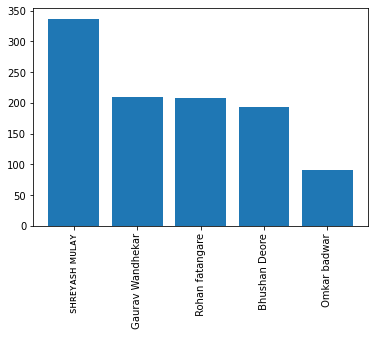

In [93]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [94]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percentage'})

,name,percentage
0,ꜱʜʀᴇʏᴀꜱʜ ᴍᴜʟᴀʏ,28.37
1,Gaurav Wandhekar,17.59
2,Rohan fatangare,17.51
3,Bhushan Deore,16.25
4,Omkar badwar,7.58
5,Siddesh Matoshri,6.73
6,Kunal bhavsar mcoe,5.47
7,group_notification,0.51


In [95]:
temp=df[df['user'] != 'group_notification']
temp=temp[temp['message'] != '<Media omitted>\n']

In [96]:
f = open("stopwords.txt", 'r', encoding='utf-8')
stopwords=f.read()


In [97]:
word=[]
for message in temp['message']:
    for i in message.lower().split():
        if i not in stopwords:
            word.append(i)
    
    

In [98]:
from collections import Counter
pd.DataFrame(Counter(word).most_common(20))

,0,1
0,😂,53
1,nhi,26
2,😂😂,26
3,udya,24
4,?,24
5,bc,22
6,nai,22
7,nahi,22
8,deleted,14
9,message,14


In [99]:
import emoji
emojis=[]
for message in temp["message"]:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))


,0,1
0,😂,163
1,🤣,97
2,🔥,20
3,🙂,11
4,🌚,11
5,😭,11
6,🥲,10
7,🥳,10
8,💦,9
9,😌,5


In [100]:
df['month_num'] = df['date'].dt.month
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [101]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+ "-"+ str(timeline['year'][i]))

In [102]:
timeline['time']=time

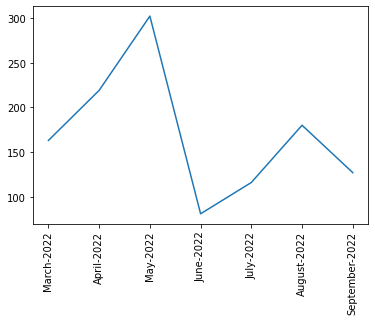

In [103]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [107]:
df['only_date']=df['date'].dt.date
df['only_date']


0       2022-03-21
1       2022-03-21
2       2022-03-21
3       2022-03-21
4       2022-03-23
           ...    
1183    2022-09-23
1184    2022-09-23
1185    2022-09-23
1186    2022-09-23
1187    2022-09-23
Name: only_date, Length: 1188, dtype: object

In [109]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()
daily_timeline


,only_date,message
0,2022-03-21,4
1,2022-03-23,57
2,2022-03-24,20
3,2022-03-27,26
4,2022-03-28,6
...,...,...
85,2022-09-16,14
86,2022-09-19,8
87,2022-09-20,1
88,2022-09-21,1


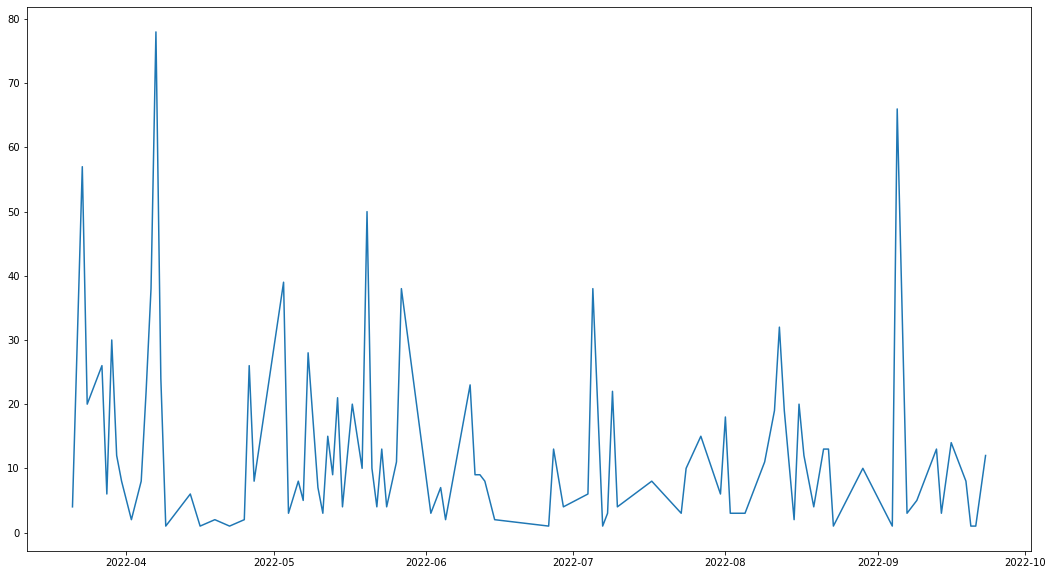

In [110]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [113]:
df['day_name']=df['date'].dt.day_name()


In [114]:
df['day_name'].value_counts()

Tuesday      237
Friday       226
Monday       177
Thursday     171
Wednesday    161
Sunday       116
Saturday     100
Name: day_name, dtype: int64

In [115]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2022-03-21 12:22:00,group_notification,Messages and calls are end-to-end encrypted. ...,2022,March,21,12,22,3,2022-03-21,Monday
1,2022-03-21 11:03:00,group_notification,"Rohan fatangare created group ""Stumdy Cheems ...",2022,March,21,11,3,3,2022-03-21,Monday
2,2022-03-21 12:22:00,group_notification,Rohan fatangare added you\n,2022,March,21,12,22,3,2022-03-21,Monday
3,2022-03-21 09:26:00,Rohan fatangare,Https://bit.ly/3ijy4FW\n,2022,March,21,9,26,3,2022-03-21,Monday
4,2022-03-23 08:58:00,Gaurav Wandhekar,Blazer ghetl ka koni\n,2022,March,23,8,58,3,2022-03-23,Wednesday


In [116]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour==23:
        period.append(str(hour)+ "-"+ str('00'))
    elif hour==0:
        period.append(str('00')+ "-"+ str(hour+1))
    else:
        period.append(str(hour)+ "-"+ str(hour+1))

In [117]:
df['period']=period

In [118]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
909,2022-08-09 09:21:00,Siddesh Matoshri,Nhi friday la ch yeu\n,2022,August,9,9,21,8,2022-08-09,Tuesday,9-10
797,2022-07-05 09:24:00,Rohan fatangare,Bc ata 10 tari padtil\n,2022,July,5,9,24,7,2022-07-05,Tuesday,9-10
684,2022-06-02 06:27:00,Gaurav Wandhekar,<Media omitted>\n,2022,June,2,6,27,6,2022-06-02,Thursday,6-7
498,2022-05-13 02:17:00,Rohan fatangare,😂😂\n,2022,May,13,2,17,5,2022-05-13,Friday,2-3
53,2022-03-23 11:00:00,ꜱʜʀᴇʏᴀꜱʜ ᴍᴜʟᴀʏ,te sng ky a\n,2022,March,23,11,0,3,2022-03-23,Wednesday,11-12


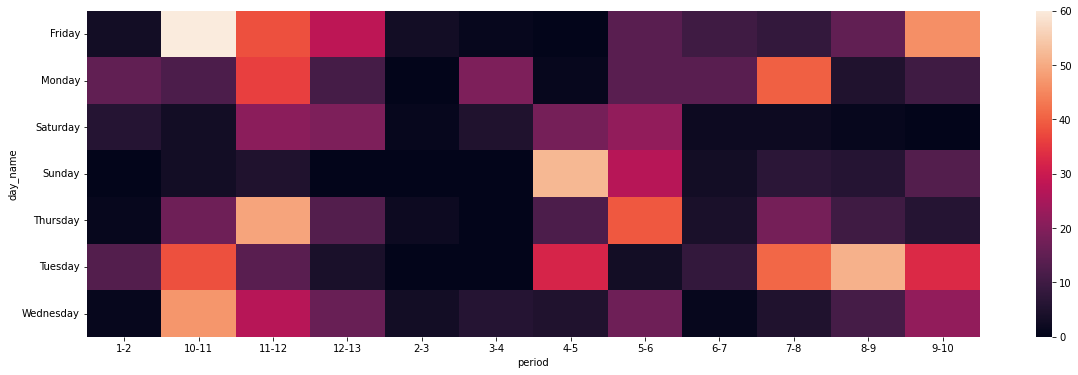

In [119]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [121]:
df.pivot_table(index='day_name', columns='period',
               values='message', aggfunc='count').fillna(0)


period,1-2,10-11,11-12,12-13,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,
Friday,3.0,60.0,38.0,28.0,3.0,1.0,0.0,14.0,10.0,8.0,15.0,46.0
Monday,15.0,12.0,36.0,11.0,0.0,19.0,1.0,14.0,14.0,40.0,5.0,10.0
Saturday,6.0,3.0,21.0,19.0,1.0,5.0,18.0,22.0,2.0,2.0,1.0,0.0
Sunday,0.0,3.0,5.0,0.0,0.0,0.0,52.0,27.0,3.0,7.0,6.0,13.0
Thursday,1.0,17.0,49.0,13.0,2.0,0.0,12.0,39.0,4.0,18.0,10.0,6.0
Tuesday,13.0,38.0,14.0,4.0,0.0,0.0,32.0,3.0,8.0,41.0,51.0,33.0
Wednesday,1.0,47.0,27.0,16.0,3.0,6.0,5.0,17.0,1.0,5.0,11.0,22.0
